### Variable Description

**1. age**  
- **Type:** Numeric  
- **Description:** Age of the client.

**2. job**  
- **Type:** Categorical  
- **Values:**
  - "admin."
  - "blue-collar"
  - "entrepreneur"
  - "housemaid"
  - "management"
  - "retired"
  - "self-employed"
  - "services"
  - "student"
  - "technician"
  - "unemployed"
  - "unknown"  
- **Description:** Type of job.

**3. marital**  
- **Type:** Categorical  
- **Values:**
  - "divorced" (includes divorced or widowed)
  - "married"
  - "single"
  - "unknown"  
- **Description:** Marital status.

**4. education**  
- **Type:** Categorical  
- **Values:**
  - "basic.4y"
  - "basic.6y"
  - "basic.9y"
  - "high.school"
  - "illiterate"
  - "professional.course"
  - "university.degree"
  - "unknown"  
- **Description:** Level of education.

**5. default**  
- **Type:** Categorical  
- **Values:**
  - "no"
  - "yes"
  - "unknown"  
- **Description:** Whether the client has credit in default.

**6. housing**  
- **Type:** Categorical  
- **Values:**
  - "no"
  - "yes"
  - "unknown"  
- **Description:** Whether the client has a housing loan.

**7. loan**  
- **Type:** Categorical  
- **Values:**
  - "no"
  - "yes"
  - "unknown"  
- **Description:** Whether the client has a personal loan.

**8. contact**  
- **Type:** Categorical  
- **Values:**
  - "cellular"
  - "telephone"  
- **Description:** Type of communication used in the last telephone contact.

**9. month**  
- **Type:** Categorical  
- **Values:**
  - "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"  
- **Description:** Last contact month of the year.

**10. day_of_week**  
- **Type:** Categorical  
- **Values:**
  - "mon"
  - "tue"
  - "wed"
  - "thu"
  - "fri"  
- **Description:** Last contact day of the week.

**11. duration**  
- **Type:** Numeric  
- **Description:** Last contact duration, in seconds. **Note:** This attribute highly affects the output target (e.g., if duration = 0 then y = "no"). It should be discarded if the intention is to have a realistic predictive model.

**12. campaign**  
- **Type:** Numeric  
- **Description:** Number of contacts performed during this campaign and for this client (includes last contact).

**13. pdays**  
- **Type:** Numeric  
- **Description:** Number of days that passed by after the client was last contacted from a previous campaign (999 means the client was not previously contacted).

**14. previous**  
- **Type:** Numeric  
- **Description:** Number of contacts performed before this campaign and for this client.

**15. poutcome**  
- **Type:** Categorical  
- **Values:**
  - "failure"
  - "nonexistent"
  - "success"  
- **Description:** Outcome of the previous marketing campaign.

**16. emp.var.rate**  
- **Type:** Numeric  
- **Description:** Employment variation rate - quarterly indicator.

**17. cons.price.idx**  
- **Type:** Numeric  
- **Description:** Consumer price index - monthly indicator.

**18. cons.conf.idx**  
- **Type:** Numeric  
- **Description:** Consumer confidence index - monthly indicator.

**19. euribor3m**  
- **Type:** Numeric  
- **Description:** Euribor 3 month rate - daily indicator.

**20. nr.employed**  
- **Type:** Numeric  
- **Description:** Number of employees - quarterly indicator.


In [1]:
P_TARGETED = .066
AVG_REVENUE = 1083
AVG_COST = -8

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline

In [4]:
df = pd.read_csv('/content/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.shape

(41188, 21)

In [6]:
cols=df.columns.tolist()

In [7]:
for _ in cols:
    print(_,"------",df[_].unique(),"\n")

age ------ [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89] 

job ------ ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

marital ------ ['married' 'single' 'divorced' 'unknown'] 

education ------ ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

default ------ ['no' 'unknown' 'yes'] 

housing ------ ['no' 'yes' 'unknown'] 

loan ------ ['no' 'yes' 'unknown'] 

contact ------ ['telephone' 'cellular'] 

month ------ ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 

day_of_week ------ ['mon' 'tue' 'wed' 'thu' 'fri'] 

duration ------ [ 261  149  226 ... 1246 1556 1868] 

campaign ------ [ 1  2  3  4  5  6  7  8  9 10 11

In [8]:
poutcome=df[df['poutcome']!='nonexistent'].poutcome.apply(lambda x:1 if x=='success' else 0)
coutcome=df['y'].apply(lambda x:1 if x=='yes' else 0)

print("Total Records: ",df.shape[0])
print("Previous markting campaign success rate: ",poutcome.sum()/len(poutcome))
print("Current markting campaign success rate: ",coutcome.sum()/df.shape[0])

Total Records:  41188
Previous markting campaign success rate:  0.24408888888888888
Current markting campaign success rate:  0.11265417111780131


In [9]:
Y=df.y
X=df.drop('y',axis=1)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state=5, stratify=Y, shuffle=True, test_size=.2)

In [11]:
df_test=pd.concat([x_test,y_test],axis=1)

In [12]:
bank=pd.concat([x_train,y_train],axis=1)

In [13]:
bank.dtypes.groupby(bank.dtypes).size()

,0
int64,5
float64,5
object,11


In [14]:
dtypes = pd.DataFrame(bank.dtypes.rename('type')).reset_index().astype('str')
dtypes = dtypes[dtypes['index']!='duration']
numeric = dtypes[(dtypes.type.isin(['int64', 'float64'])) & (dtypes['index'] != 'duration')]['index'].values
categorical = dtypes[~(dtypes['index'].isin(numeric)) & (dtypes['index'] != 'y')]['index'].values

print('Numeric:\n', numeric)
print('Categorical:\n', categorical)

Numeric:
 ['age' 'campaign' 'pdays' 'previous' 'emp.var.rate' 'cons.price.idx'
 'cons.conf.idx' 'euribor3m' 'nr.employed']
Categorical:
 ['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome']


## ANALYSIS : Categorical and Numeric

In [15]:
bank[categorical].isnull().sum()

,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0
poutcome,0


In [16]:
bank[numeric].isnull().sum()

,0
age,0
campaign,0
pdays,0
previous,0
emp.var.rate,0
cons.price.idx,0
cons.conf.idx,0
euribor3m,0
nr.employed,0


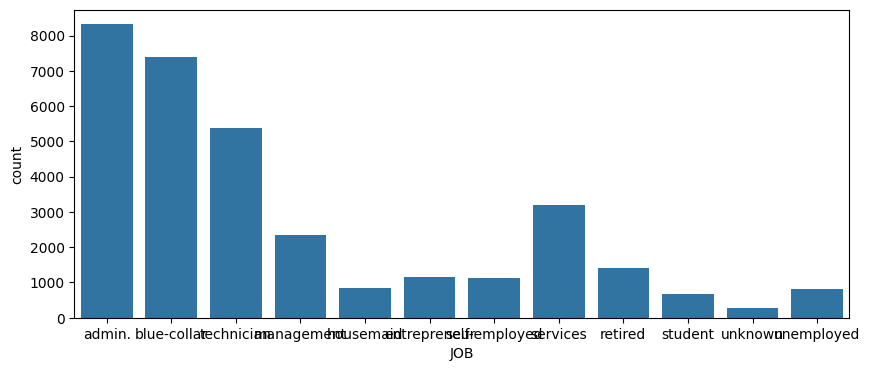

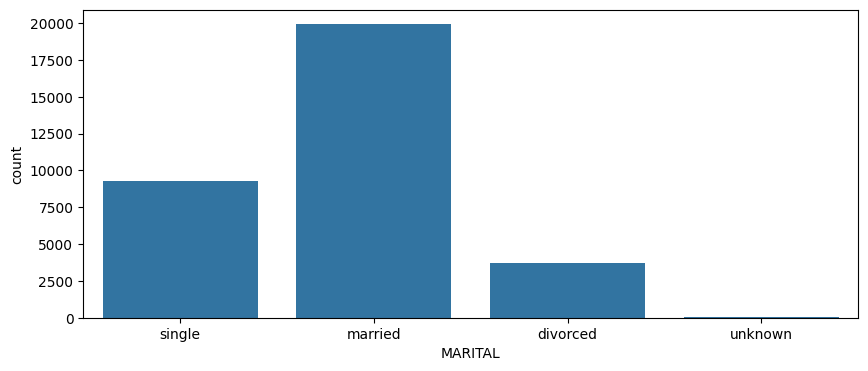

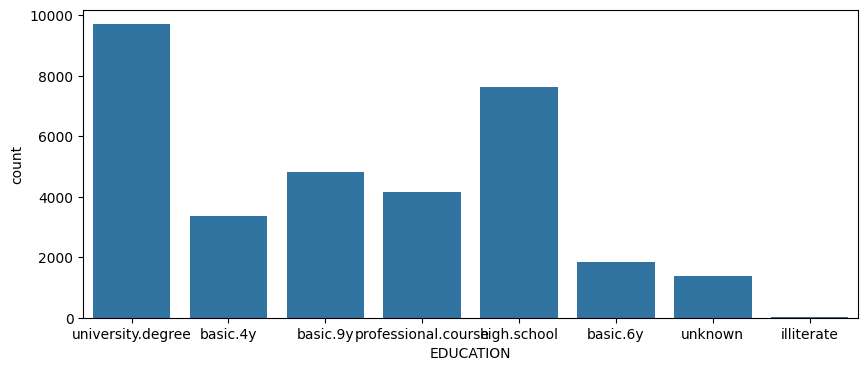

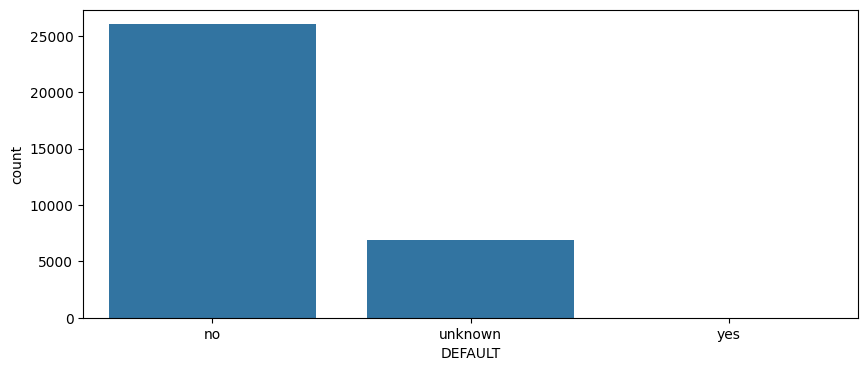

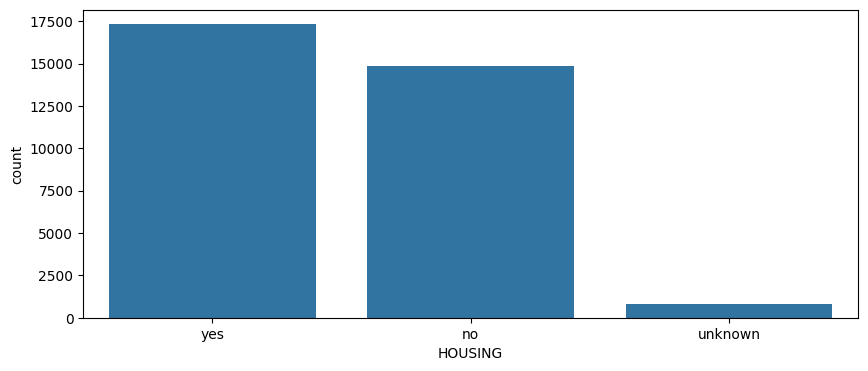

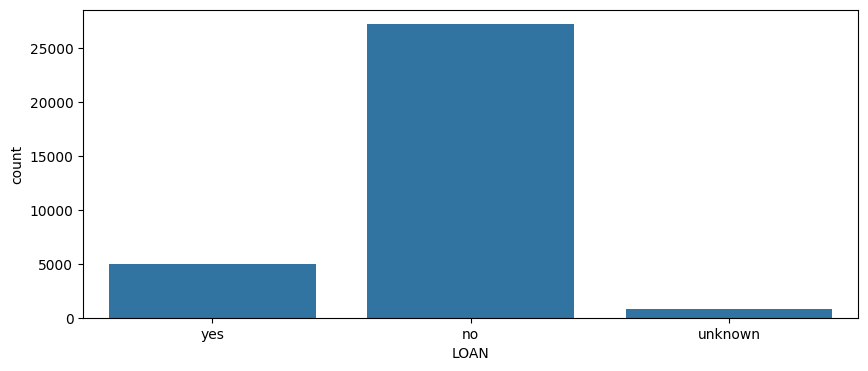

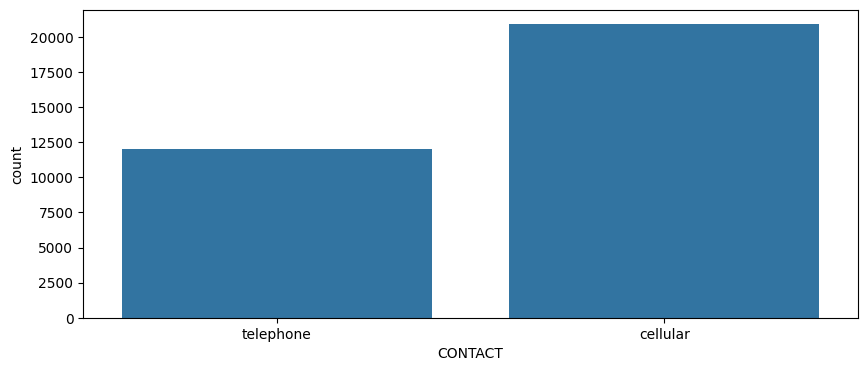

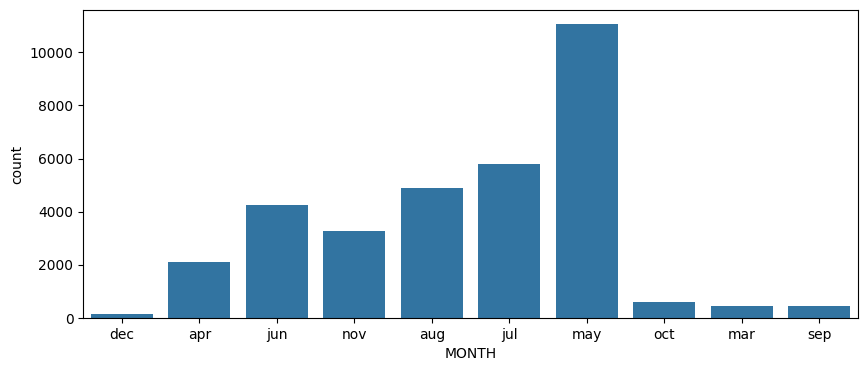

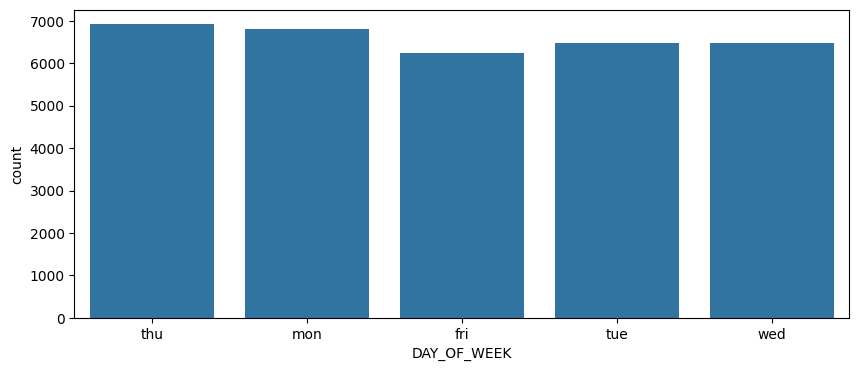

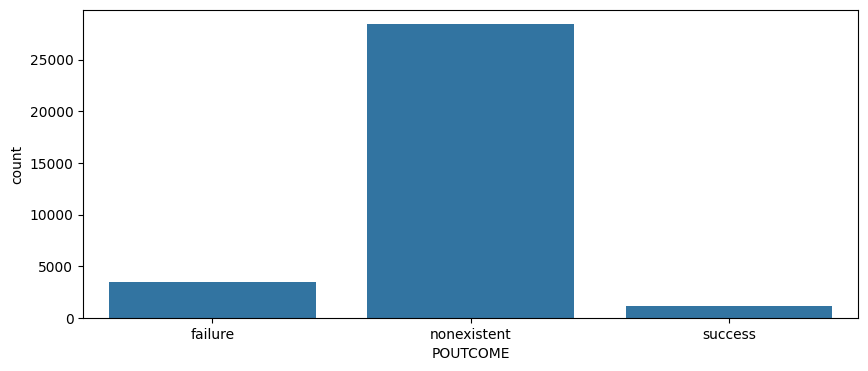

In [103]:

for i in categorical:
    plt.figure(figsize=(10,4))
    sns.countplot(data=bank,x=i)
    plt.xlabel(i.upper())
    plt.show()

>A very few proportion of customers are illiterate

>No or very few customers who have defaulted on a loan - not surprising, the bank probably does not want to extend an offer to customers with bad credit

>Similar proportions of customers with and without housing loans

>Few customers have personal loans

>Almost double as many cellular as landline phone calls

>Fewer calls made in the second half of the year

>Calls are uniform accross days of the week

>Some customers were already contacted previously by the bank but many were never contacted at all

In [18]:
marital_resp_rate=(bank.groupby('marital').y.value_counts()/bank.groupby('marital').size()).rename('rate').reset_index()

In [19]:
marital_pos_rate=marital_resp_rate[marital_resp_rate['y'] == "yes"]
marital_pos_rate

,marital,y,rate
1,divorced,yes,0.106073
3,married,yes,0.101641
5,single,yes,0.138877
7,unknown,yes,0.129032


>marital status isn't very predictive of outcome

In [20]:
ct_resp_rate=(bank.groupby('contact').y.value_counts()/bank.groupby('contact').size()).rename('rate').reset_index()

In [21]:
ct_pos_rate=ct_resp_rate[ct_resp_rate['y'] == "yes"]
ct_pos_rate

,contact,y,rate
1,cellular,yes,0.146759
3,telephone,yes,0.053466


> contact medium appears to have good predictive power - nearly 4x increase in conversion rate for customers who were contacted on their mobile phone

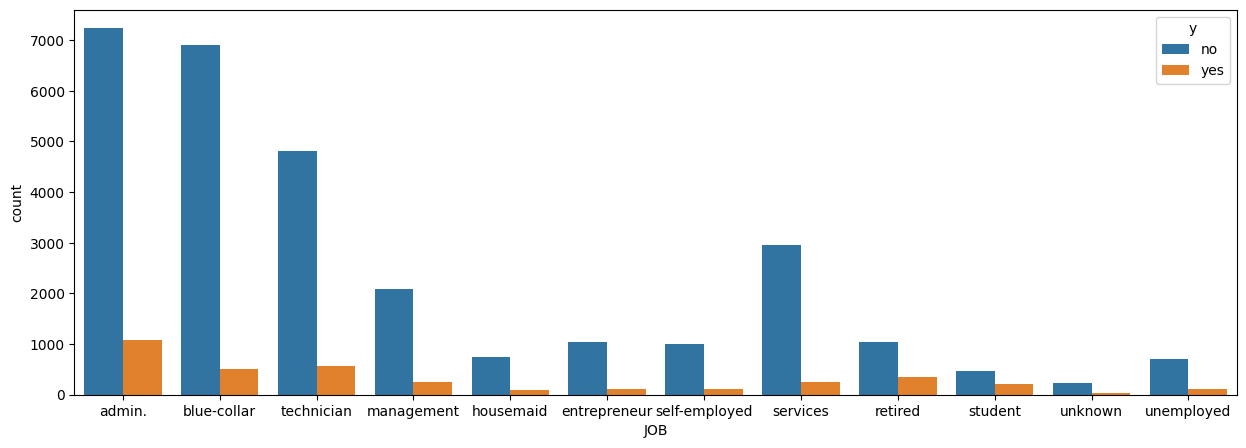

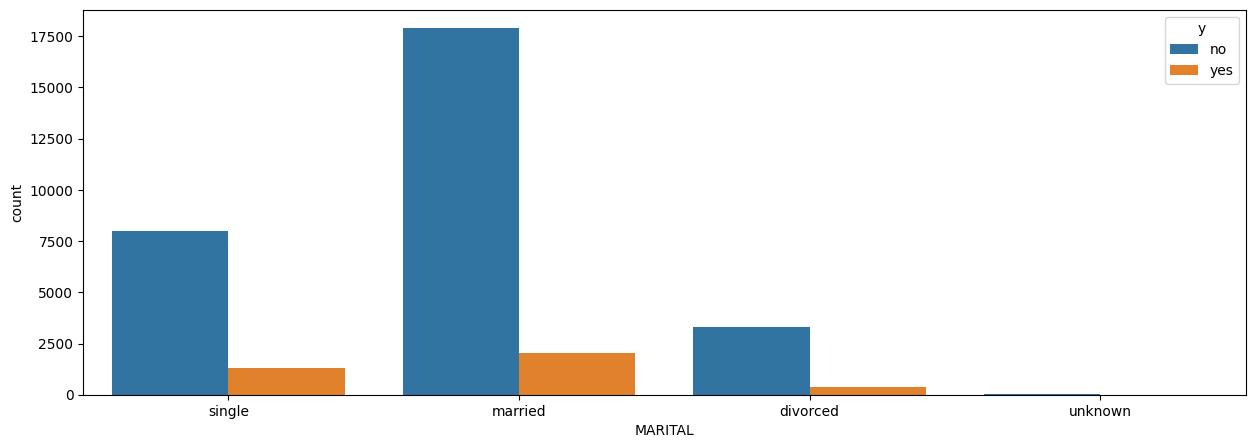

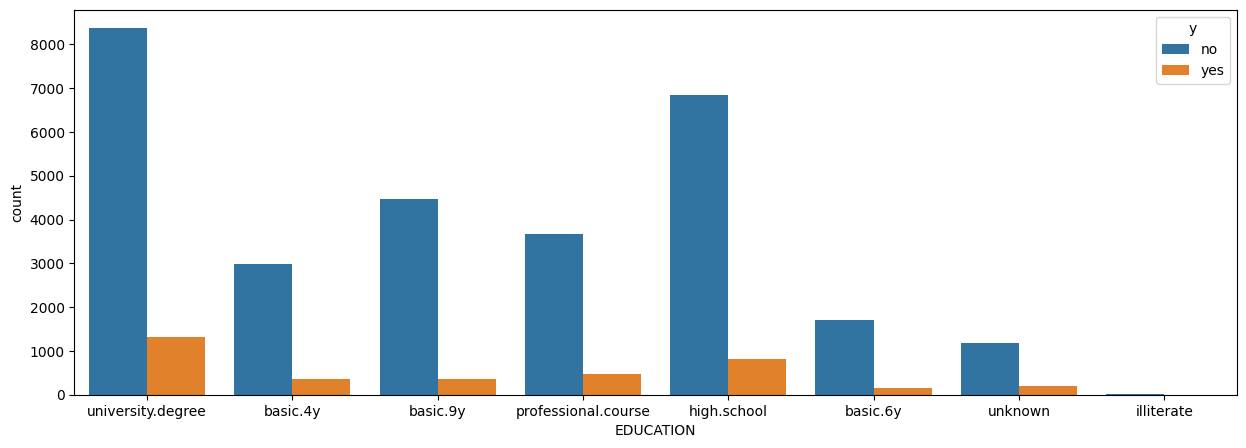

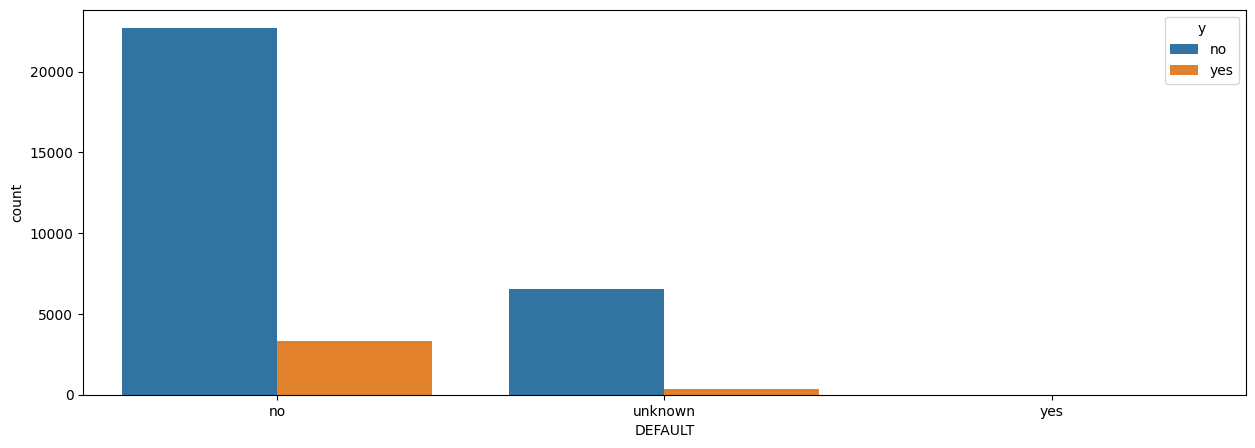

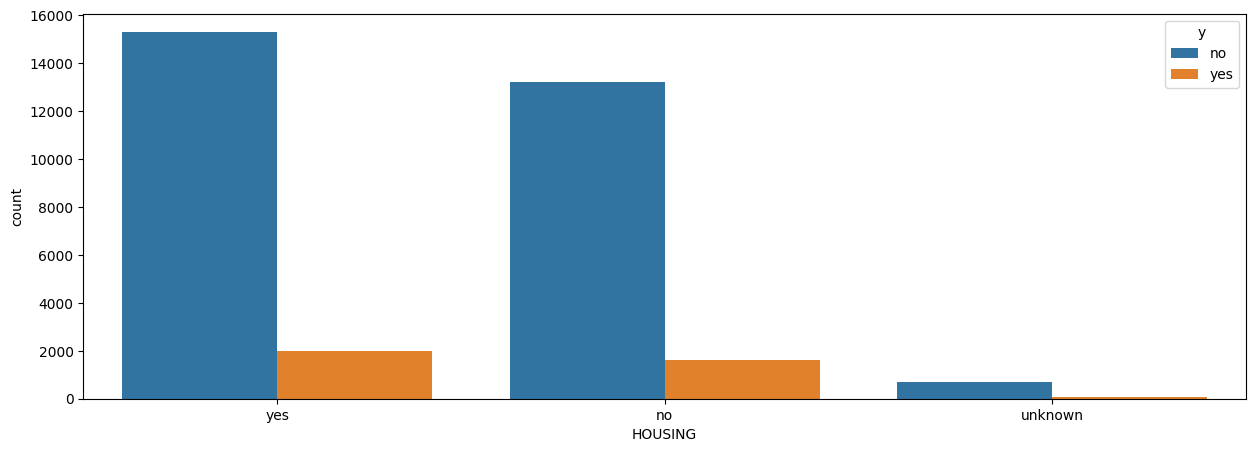

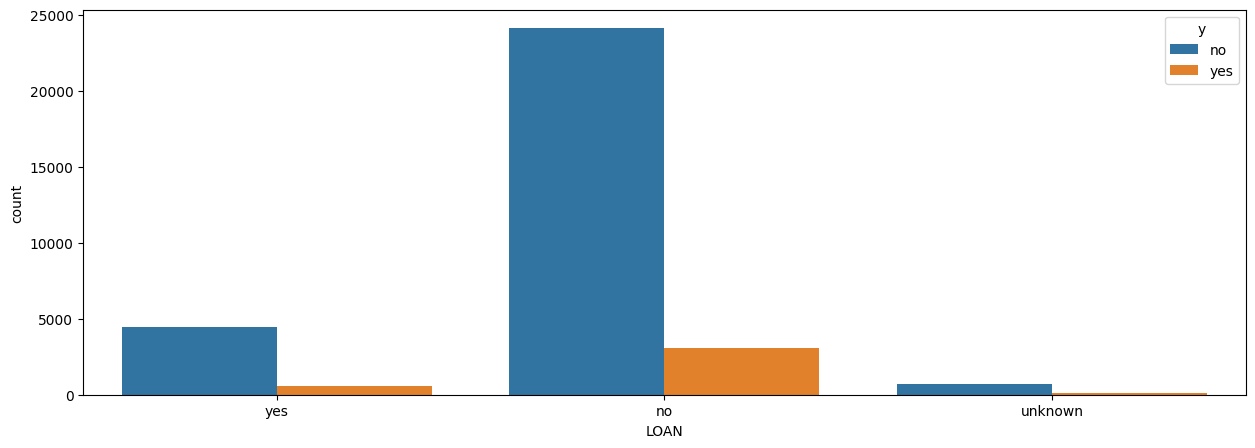

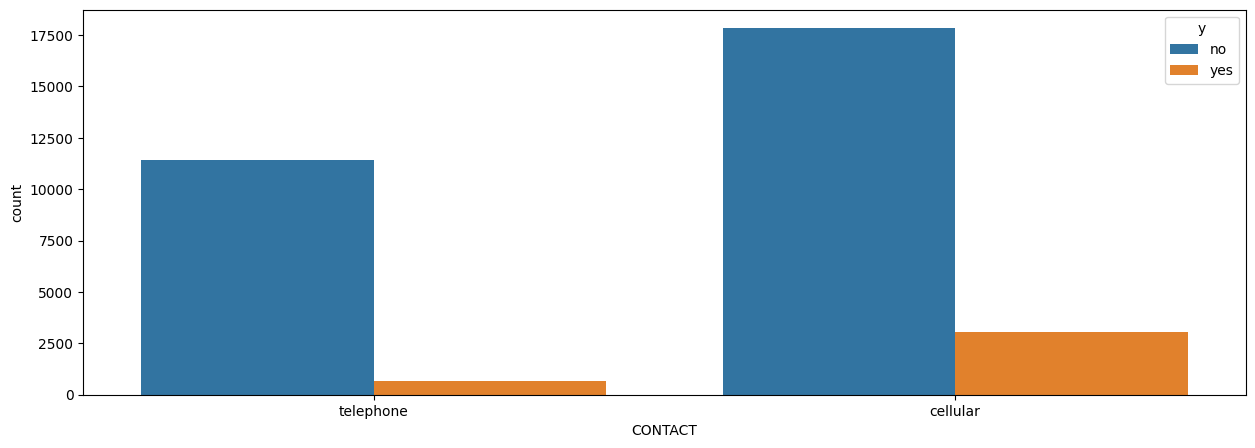

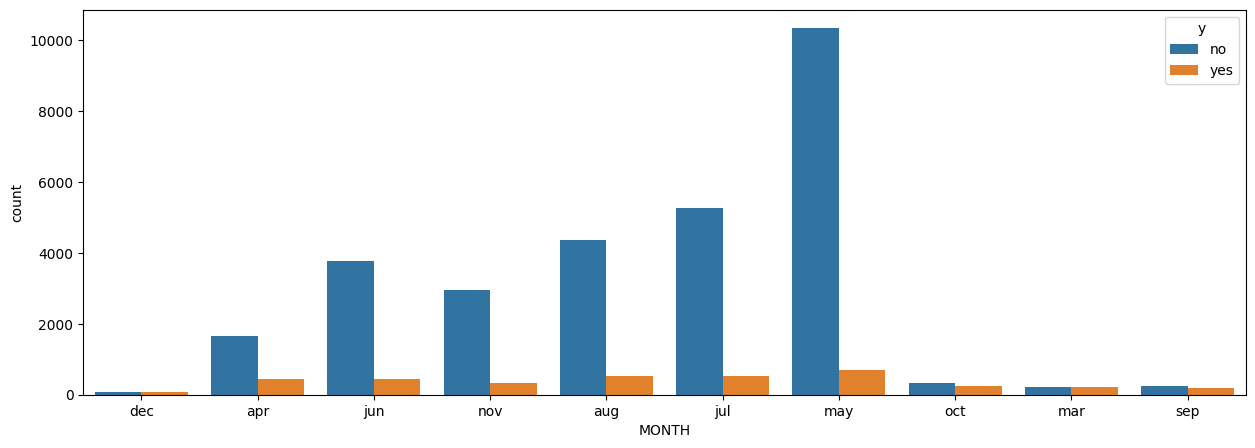

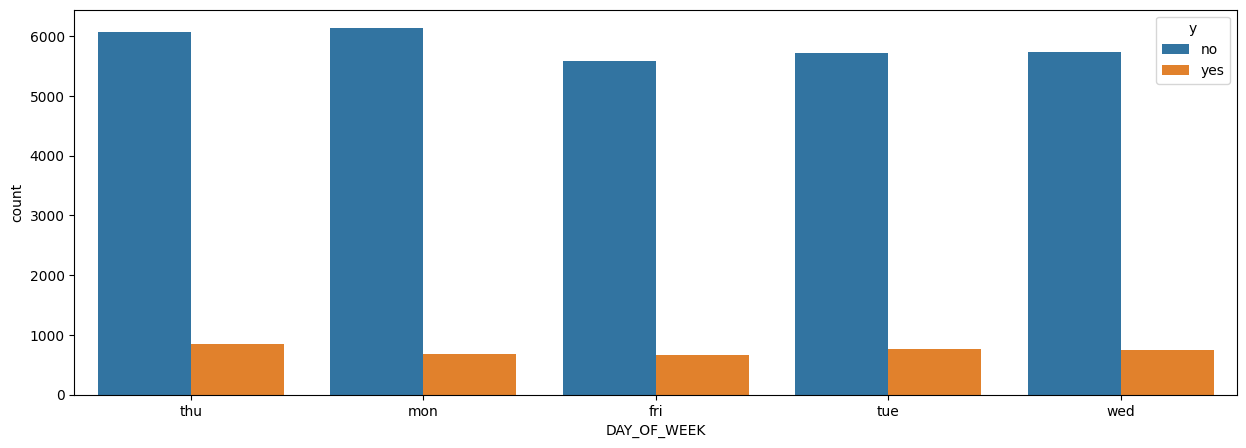

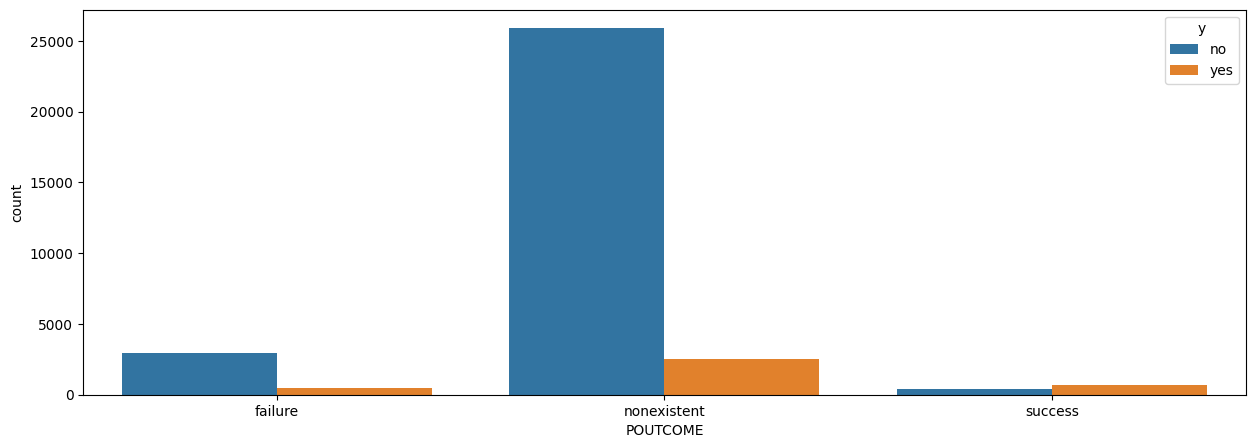

In [101]:
for i in categorical:
    plt.figure(figsize=(15,5))
    sns.countplot(data=bank,x=i,hue=bank.y)
    plt.xlabel(i.upper())
    plt.show()

>The ‘default’ attribute seems to have significant predictive potential, particularly due to a substantial number of instances being ‘no’.

>In terms of job categories, individuals who are administrators, retired, students, or unemployed tend to have a higher response rate. However, the groups of retired individuals, students, and unemployed individuals are smaller in size. .

>A number of attributes (such as job, marital status, education, default, housing, and loan) have missing values. However, for all these variables, except ‘default’, the occurrence of the ‘unknown’ value is quite low. Moreover, the response rate associated with the ‘unknown’ value is comparable to that of other known values. This suggests that there may not be a need to employ techniques for handling missing values for these variables.

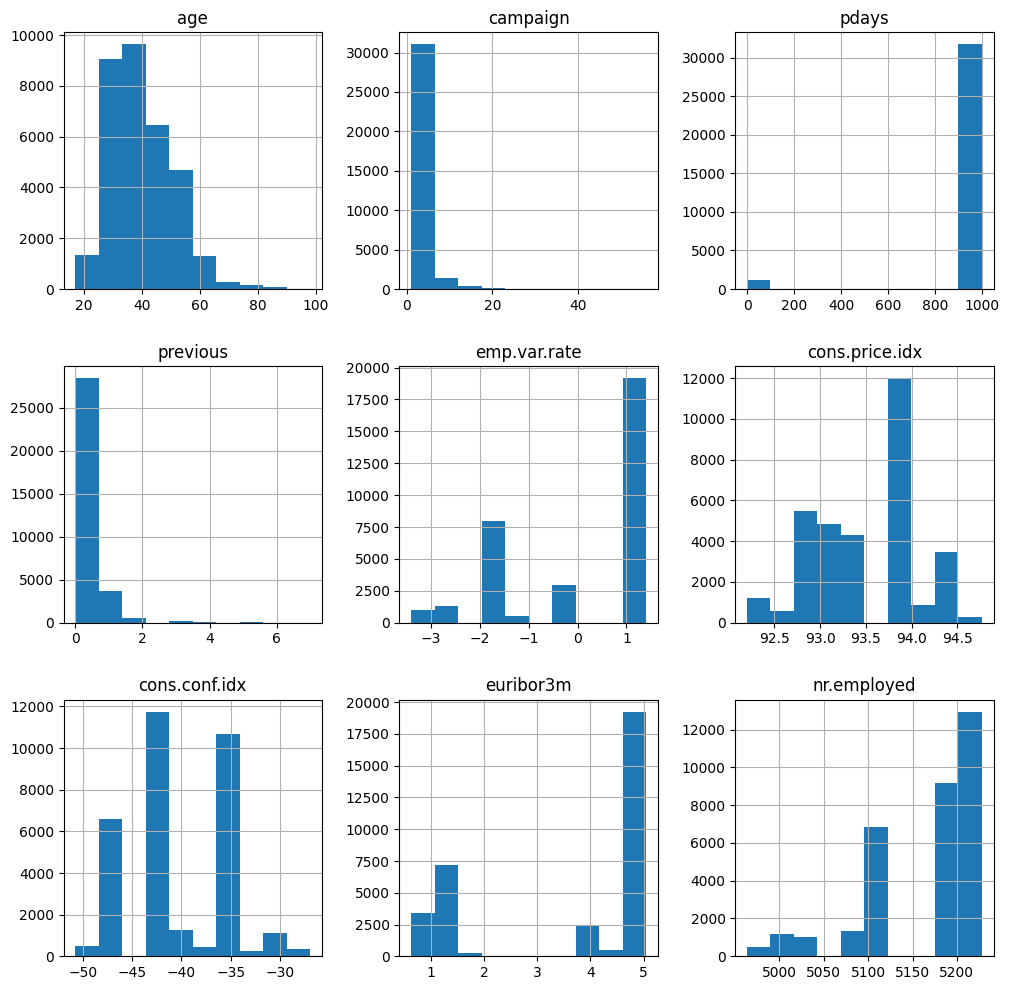

In [23]:
bank[numeric].hist(figsize=(12,12));

In [24]:
bank[numeric].describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.066889,2.572807,962.142944,0.174143,0.077736,93.575686,-40.510085,3.616822,5166.780219
std,10.456700,2.783883,187.729206,0.497917,1.572889,0.578854,4.632135,1.736333,72.383914
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


>outliers in age indicating customers who are very old

>The fact that a majority of instances have a pdays value of 999 (missing) is going to be problematic if we want to use the attribute as a model feature. Since so few instances have an associated pdays, we could remove it from the analysis and modelling process.

>previous can be treated as a discrete variable

<Axes: >

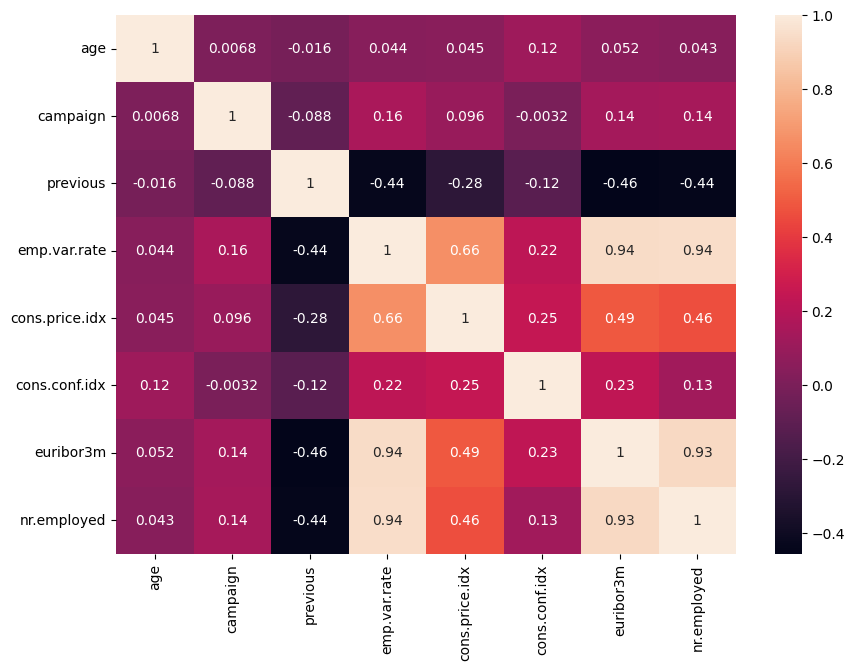

In [25]:
plt.figure(figsize=(10,7))
corr = bank[numeric].drop('pdays', axis=1).corr(method='spearman')
sns.heatmap(corr, annot=True)

Correlation between the following are significant:

*emp.var.rate(employment variation rate) and cons.price.idx*
    
*emp.var.rate(employment variation rate) and euribor3m (euriboro 3 month rate)*
    
*emp.var.rate and nr.employed (number of employees)*
    
*nr.employed and euribor3m*

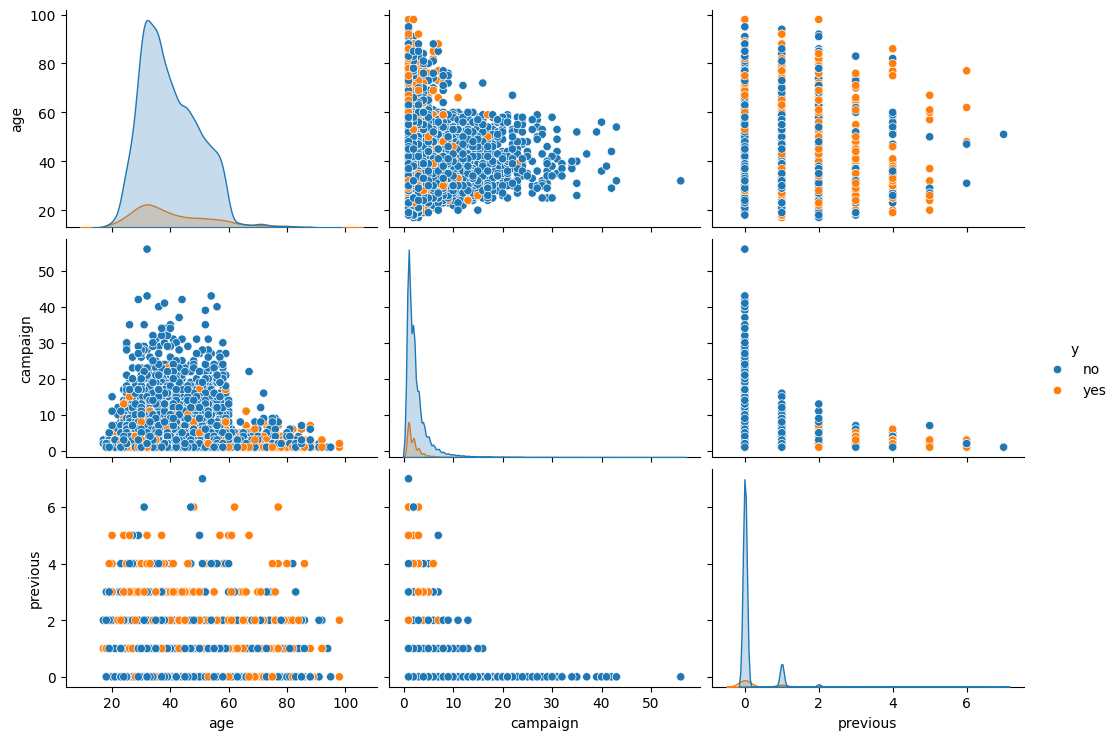

In [26]:
customer_att=['age','campaign','previous','y']
numeric_outcome=pd.concat([bank[numeric],bank['y']],axis=1)
sns.pairplot(numeric_outcome[customer_att],hue='y',aspect=1.4)

>customers who were contacted more than ten times in 18-60 were not likely to respond to the campaign.

In [27]:
camp1=bank[bank['campaign']<10]
camp1=camp1.groupby("y").size()/len(camp1)

In [28]:
camp1

,0
y,
no,0.885207
yes,0.114793


In [29]:
camp2=bank[bank['campaign']>=10]
camp2=camp2.groupby("y").size()/len(camp2)

In [30]:
camp2

,0
y,
no,0.965714
yes,0.034286


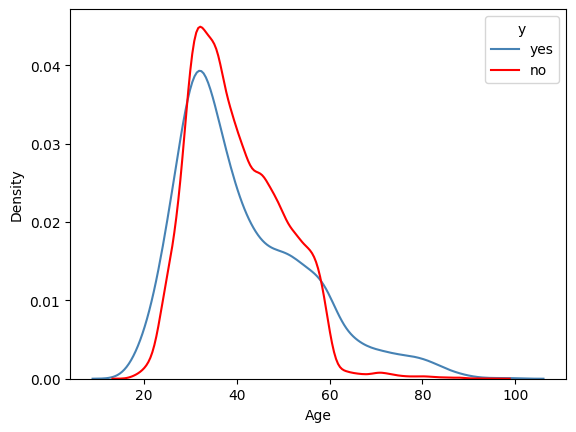

In [31]:
y_dt=bank[bank.y=='yes']['age']
n_dt=bank[bank.y=='no']['age']

sns.kdeplot(y_dt, color='steelblue', label='yes')
sns.kdeplot(n_dt, color='red', label='no')
plt.legend(title='y')
plt.xlabel("Age")
plt.show()


>Customers at the younger and older ends of the age spectrum appear to have a higher conversion rate compared to those in the middle age range. This may be because younger customers are typically interested in growing their savings, while older customers may be looking to invest their capital.

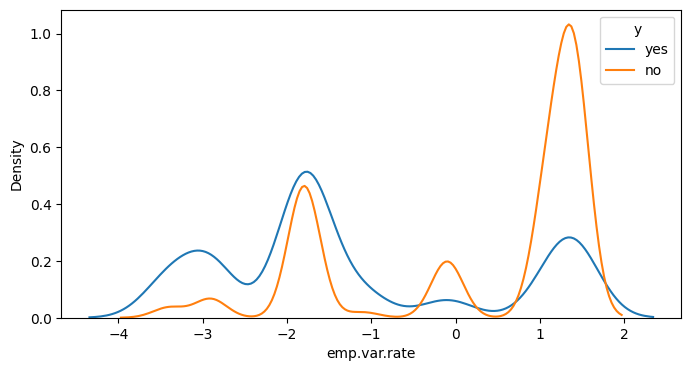

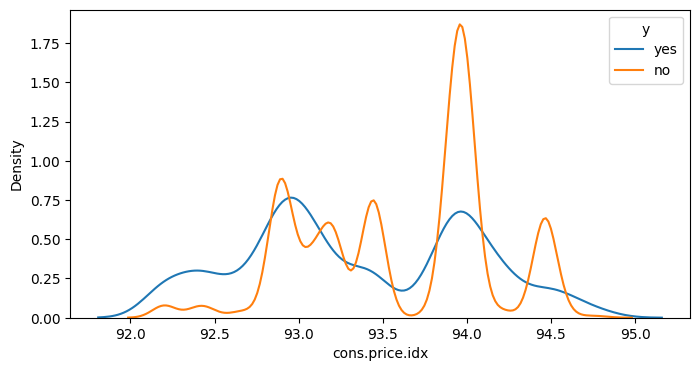

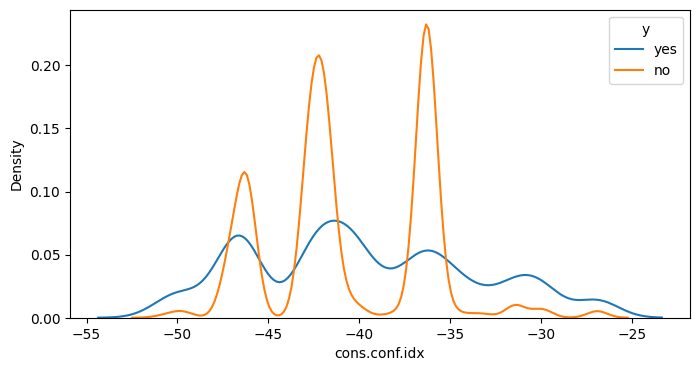

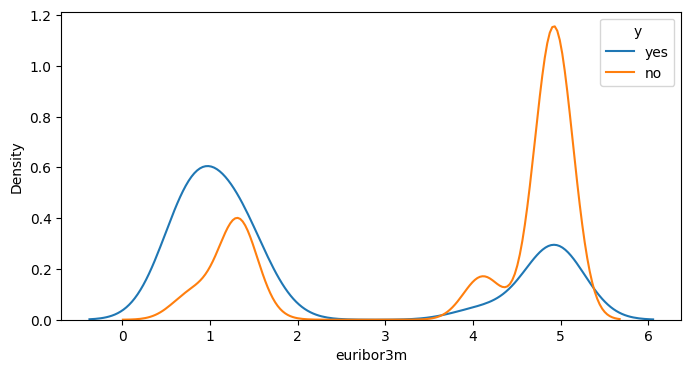

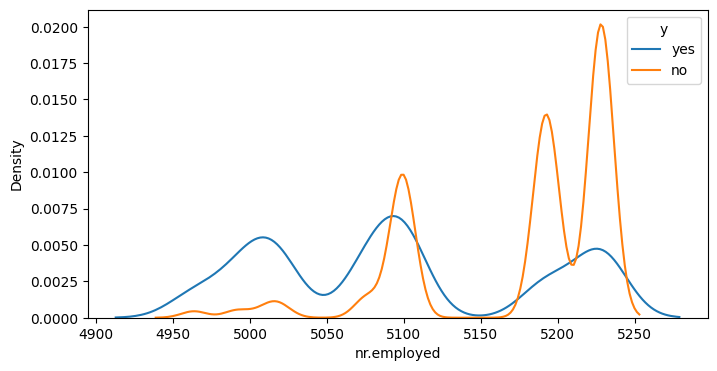

In [99]:
soc_Att=['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','y']
soc_ec = bank[soc_Att]

for i in soc_Att[:-1]:

    plt.figure(figsize=(8,4))
    for outcome in ['yes', 'no']:
        data = soc_ec[soc_ec.y == outcome][i]
        sns.kdeplot(data, label=outcome)

    # Add legend and title
    plt.legend(title='y')
    plt.show()


Customers are likely to convert when:

*emp.var.rate is low*

*consumer price index is in lower spectrum*

*euribor-3 month rate is low is low*

*no. of employed is low*

*consumer confidence index is in either of the lowest or highest spectrum*

 What we can do is modify pdays as an indicator variable

 Transform previous to categorical variable

Binning age and campaign


In [33]:
def prev_contacted(X):
        return (X != 999)

def partoflast_campaign(X):
        pcampaign = ~(X == 'nonexistent')
        return pcampaign

def contacted_10(X):
        return (X >= 10)

def prev_discrete(X):
        return str(X)

In [34]:
X['prev_contacted']=X['pdays'].apply(prev_contacted)

In [35]:
X['p_lastcamp']=X['poutcome'].apply(partoflast_campaign)
X['previous_disc']=X['previous'].apply(prev_discrete)
X['camp_gte10']=X['campaign'].apply(contacted_10)

In [36]:
categorical

array(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome'], dtype=object)

In [37]:
CATEGORICAL_FEATURES =  [
  'job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome',
    'p_lastcamp','previous_disc','camp_gte10','prev_contacted']


In [38]:
NUMERIC_FEATURES = [
    'age',
    'campaign',
    'previous',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed'
]

In [39]:
X['age']=np.log(X['age'])

In [40]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded_cols = encoder.fit_transform(X[CATEGORICAL_FEATURES])


encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(CATEGORICAL_FEATURES))

# Now you can join this DataFrame with your original DataFrame
X = X.join(encoded_df)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [41]:
del encoded_df

In [42]:
from sklearn.preprocessing import RobustScaler

In [43]:
scaler=RobustScaler()

In [44]:
X[NUMERIC_FEATURES] = scaler.fit_transform(X[NUMERIC_FEATURES])

In [45]:
data=X.copy()

In [46]:
data=data.drop(CATEGORICAL_FEATURES,axis=1)

In [47]:
data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

In [48]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold,StratifiedKFold,cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import mutual_info_classif, chi2,SelectKBest

In [49]:
# Assuming df is your DataFrame and 'target' is your target column
df['y'] = df['y'].map({'yes': 1, 'no': 0})


In [50]:
y=df['y']

In [58]:
def cv_score(model, rstate = 45, cols = data.columns):
    dff=data[cols]
    cv=[]
    ac=[]
    i=1
    kf=StratifiedKFold(n_splits=5,random_state=rstate,shuffle=True)
    for df_index,test_index in kf.split(dff,y):
        xtr,xval=dff.loc[df_index],dff.loc[test_index]
        ytr,yval=y.loc[df_index],y.loc[test_index]
        print("\n{} of KFold{}".format(i,kf.n_splits))

        model=model
        model.fit(xtr,ytr)
        pred_pr=model.predict_proba(xval)
        pp=model.predict(xval)


        recall=recall_score(yval,pp)
        precision=precision_score(yval,pp)
        f1score=f1_score(yval,pp)


        print(" Recall Score {} Precision Score {:.4f} F1 score{:.4f}".format(recall,precision,f1score))
        acc=accuracy_score(yval,pp)
        cv.append(precision)
        ac.append(acc)
        i+=1
    return cv,ac

In [59]:
model = GradientBoostingClassifier()
cv,acc=cv_score(model)


1 of KFold5
 Recall Score 0.5301724137931034 Precision Score 0.6604 F1 score0.5882

2 of KFold5
 Recall Score 0.5538793103448276 Precision Score 0.6737 F1 score0.6079

3 of KFold5
 Recall Score 0.5258620689655172 Precision Score 0.6550 F1 score0.5834

4 of KFold5
 Recall Score 0.5193965517241379 Precision Score 0.6676 F1 score0.5842

5 of KFold5
 Recall Score 0.5107758620689655 Precision Score 0.6657 F1 score0.5780


In [61]:
acc#Accuracy scores

[0.9163631949502307,
 0.9195193008011653,
 0.9153920854576354,
 0.9167172514264902,
 0.9159888308850309]

#### Our fundamental model operates on a simple principle:
If a customer converted during the last campaign, predict that they will convert again when contacted for the current campaign.
 The outcome of the previous campaign is represented by the attribute 'poutcome', which can have one of three values: 'success', 'failure', or 'nonexistent'. We interpret 'nonexistent' to mean that the customer was not contacted during the previous campaign.

In [62]:
mapping={'yes':1,'no':0}
Y=Y.map(mapping)

In [ ]:
n_instances = len(df)
p_instances = df.y.sum() / len(df.y)  #my conversion rate
p_targeted = .066 #prop. of popn to target
n_targeted = int(n_instances*p_targeted) # eexactly how many are we targeting

print('Number of instances: {:,}'.format(n_instances))
print('Number of conversions {:,}'.format(y.sum()))
print('Conversion rate: {:.2f}%'.format(p_instances*100.))
print('6.6% of the population {:,}'.format(n_targeted))
print('Expected number of conversions targetting {:,} @ {:.2f}%: {:,}'.format(n_targeted, p_instances*100., int(p_instances * n_targeted))) #how many conv. i can expect in target popn size

Number of instances: 41,188
Number of conversions 4,640
Conversion rate: 11.27%
6.6% of the population 2,718
Expected number of conversions targetting 2,718 @ 11.27%: 306


In [63]:
dfy=df.y
dfx=df.drop('y',axis=1)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(dfx,dfy, random_state=9, stratify=dfy, shuffle=True, test_size=.2)

In [65]:
n_instances = len(x_train)
p_instances = y_train.sum() / len(y_train)
p_targeted = .066
n_targeted = int(n_instances*p_targeted)

print('Number of instances: {:,}'.format(n_instances))
print('Number of conversions {:,}'.format(y_train.sum()))
print('Conversion rate: {:.2f}%'.format(p_instances*100.))
print('6.6% of the population {:,}'.format(n_targeted))
print('Expected number of conversions targetting {:,} @ {:.2f}%: {:,}'.format(n_targeted, p_instances*100., int(p_instances * n_targeted)))

Number of instances: 32,950
Number of conversions 3,712
Conversion rate: 11.27%
6.6% of the population 2,174
Expected number of conversions targetting 2,174 @ 11.27%: 244













*  Randomly selects additional instances from the remaining data.
*  Combines the successful instances with the randomly chosen instances to form a baseline targeted sample.
*   Calculates the financial outcomes based on whether each instance resulted in a conversion or not.
*  This baseline helps in evaluating and comparing the performance of your targeted marketing strategy against expected outcomes.





In [67]:
x_test_success = x_test[x_test.poutcome == 'success']
n_targeted_test=int(len(x_test)*p_targeted) #total number of instances you plan to include in your targeted sample.
n_rest = n_targeted_test - len(x_test_success) #Determines the number of additional instances needed to meet the targeted count.

# Randomly choose from the remaining instances
rest = x_test[~(x_test.index.isin(x_test_success.index))].sample(n=n_rest, random_state=1)
baseline_targets = pd.concat([x_test_success, rest], axis=0)
baseline_ys = y_test.loc[baseline_targets.index]
baseline_outcomes = baseline_ys.apply(lambda x: AVG_COST if x == 0 else AVG_COST+AVG_REVENUE)

In [68]:
n_targeted_test,n_rest

(543, 239)

In [69]:
baseline_profit = sum(baseline_outcomes)

print('Number of customers targeted: {:,}/{:,}\n'.format(len(baseline_targets), len(x_test)))

print('Conversion rate under baseline policy: {:.1}%'.format(baseline_ys.sum() / len(baseline_ys)*100.))
print('Expected profit under baseline policy: ${:,}'.format(baseline_profit))


Number of customers targeted: 543/8,238

Conversion rate under baseline policy: 4e+01%
Expected profit under baseline policy: $249,078


In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(data,y, random_state=9, stratify=y, shuffle=True, test_size=.25)

In [77]:

# Create a Gradient Boosting Classifier instance
gb_classifier = GradientBoostingClassifier()

# Fit the model to your training data
gb_classifier.fit(X_train, Y_train)

# Predict probabilities for test data
probs = gb_classifier.predict_proba(X_test)

# Predict class labels for test data
preds = gb_classifier.predict(X_test)


In [79]:
n_targeted_test=int(len(X_test)*p_targeted)
probs_df = pd.DataFrame(np.hstack([probs, Y_test.values.reshape(-1,1), preds.reshape(-1,1)]), columns=['p_no', 'p_yes', 'actual', 'predicted'])

# Sort customers by the probability that they will convert
model_targets = probs_df.sort_values('p_yes', ascending=False)

# Take the top 6.6%
model_targets = model_targets.head(n_targeted_test)

# Calculate financial outcomes
model_outcomes = model_targets.actual.apply(lambda x: AVG_COST if x == 0 else AVG_COST+AVG_REVENUE)

In [95]:
model_profit = sum(model_outcomes)
correct_predictions = probs_df[probs_df['actual'] == probs_df['predicted']]

print('Number of customers targeted: {:,}/{:,}'.format(len(model_targets), len(X_test)))
print("Number of customers correctly targeted: /{:,}/{:,}".format(len(correct_predictions),len(X_test)))
print('Expected profit of model policy: ${:,}'.format(model_profit))
print('Lift over baseline: {:.2f} or ${:,}'.format(model_profit / baseline_profit, model_profit - baseline_profit))

Number of customers targeted: 679/10,297
Number of customers correctly targeted: /9,455/10,297
Expected profit of model policy: $526,321
Lift over baseline: 2.11 or $277,243


In [104]:
probs_df

,p_no,p_yes,actual,predicted
0,0.994237,0.005763,0.0,0.0
1,0.994407,0.005593,0.0,0.0
2,0.995333,0.004667,0.0,0.0
3,0.994176,0.005824,0.0,0.0
4,0.997007,0.002993,0.0,0.0
...,...,...,...,...
10292,0.973392,0.026608,0.0,0.0
10293,0.913647,0.086353,0.0,0.0
10294,0.555824,0.444176,0.0,0.0
10295,0.439501,0.560499,1.0,1.0


In [96]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(model_targets.actual, model_targets.predicted))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       188
         1.0       0.72      1.00      0.84       491

    accuracy                           0.72       679
   macro avg       0.36      0.50      0.42       679
weighted avg       0.52      0.72      0.61       679



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
FP = (1 - 0.71)*388


In [98]:
print('Cost of false positives: ${:,}'.format(FP*8))

Cost of false positives: $900.1600000000001


**The false positive cost is negligible so we can move forward.**